# Customer Churn Prediction 💁‍♀️

### Exploratory Data Analysis

In [1]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler

## Data Exploration and Pre-Processing

### Data Loading

In [2]:
# Load data source
raw_data = pd.read_csv('..\Data\WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Exploratory Data Analysis

- The data has 21 columns and 7,043 rows:
    - Each row represents an individual customer entry
    - Each column represent a custumer attribute including: churn (whether the customer left within the last month), services which the customer signed-up for, customer account information (e.g. tenure payment method, contract), and customer demographic information

- The data does not record any missing values

In [3]:
# Raw dataset: first 5 rows
raw_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Raw dataset: column overview
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Summary Statistics

In [5]:
# Numerical variables
raw_data.describe().style.format("{:.2f}")

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


The summary statistics for the variables recorded as numerical suggest:
- `SeniorCitizen` is a categorical variable encoded 1: Senior Citizen, 0: Non Senior Citizen. 
- `tenure` is a numerical value recorded in months
- `MonthlyCharges` is a numerical variable recorded in USD

In [6]:
# Categorical Variables
unique_categories = raw_data.select_dtypes(include=['object']).nunique()
mode_values = raw_data.select_dtypes(include=['object']).mode().iloc[0]
category_lists = raw_data.select_dtypes(include=['object']).apply(lambda x: x.unique().tolist())


summary_table = pd.DataFrame({
    'Unique Categories': unique_categories,
    'Mode': mode_values,
    'Categories': category_lists
})

summary_table


,Unique Categories,Mode,Categories
customerID,7043,0002-ORFBO,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
gender,2,Male,"[Female, Male]"
Partner,2,No,"[Yes, No]"
Dependents,2,No,"[No, Yes]"
PhoneService,2,Yes,"[No, Yes]"
MultipleLines,3,No,"[No phone service, No, Yes]"
InternetService,3,Fiber optic,"[DSL, Fiber optic, No]"
OnlineSecurity,3,No,"[No, Yes, No internet service]"
OnlineBackup,3,No,"[Yes, No, No internet service]"
DeviceProtection,3,No,"[No, Yes, No internet service]"


The summary statistics for the variables recorded as object suggest:
- A subset are variables are categorical and encoded as *Yes* and *No*
    - For example: `Dependants` (i.e., does the customer have dependants), `Partner` (i.e., does the customer have a partner)
- A subset are variables which encoded as *Yes*, *No*, *No service* (when the correponding service is not relevant given the customer does not have a separate phone service or internet service)
    - For example: `OnlineSecurity`
- A subset of the data is encoded with up to 4 categories based on the service the customer has signed-up for
- `TotalCharges`are incorrectly recorded as object, the data type is updated to numerical below


In [7]:
# Update TotalCharges from object to numerical
raw_data['TotalCharges'] = raw_data['TotalCharges'].replace(' ', np.nan)
raw_data['TotalCharges'] = raw_data['TotalCharges'].astype('float64')

### Visualisations

#### Numerical Variables

In [8]:
# Define histogram ploting function
def histogram_graph(y, title, x_label, colour):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 7))
    sns.histplot(raw_data[y], kde=True, color=colour, bins=30)
    plt.title('Histogram: ' + title, fontsize=14, fontweight='bold')
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.show()

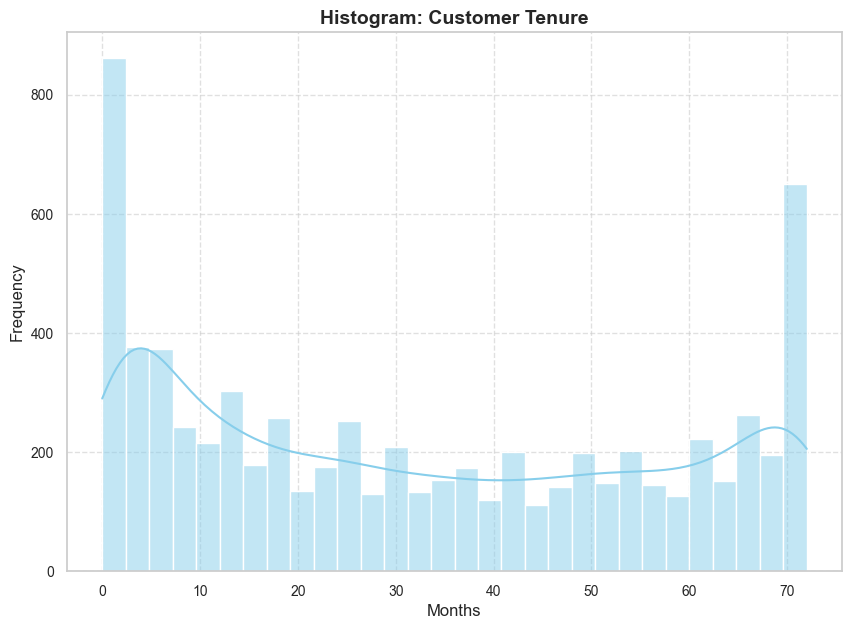

In [9]:
# Histogram: tenure
histogram_graph('tenure', 'Customer Tenure', 'Months', 'skyblue')

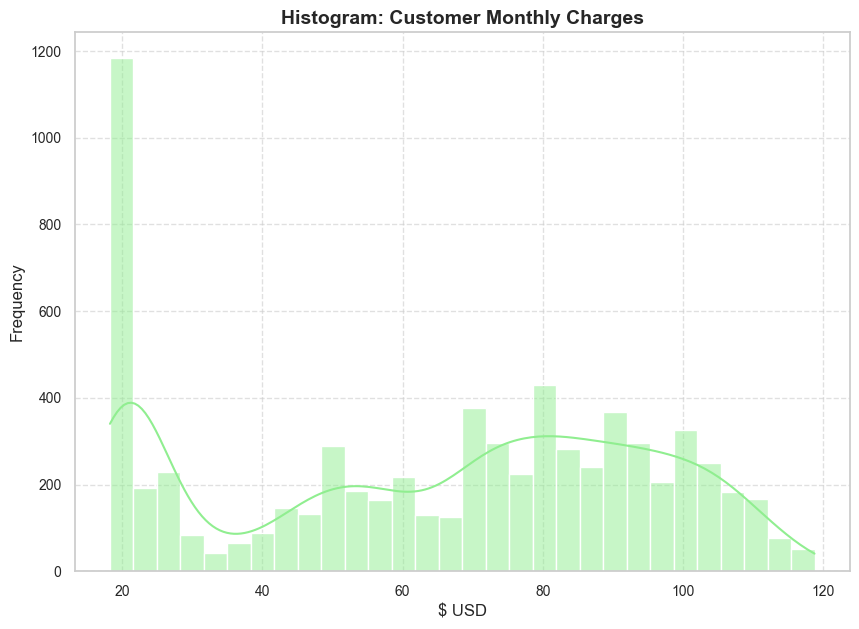

In [10]:
# Histogram: MonthlyCharges
histogram_graph('MonthlyCharges', 'Customer Monthly Charges', '$ USD', 'lightgreen')

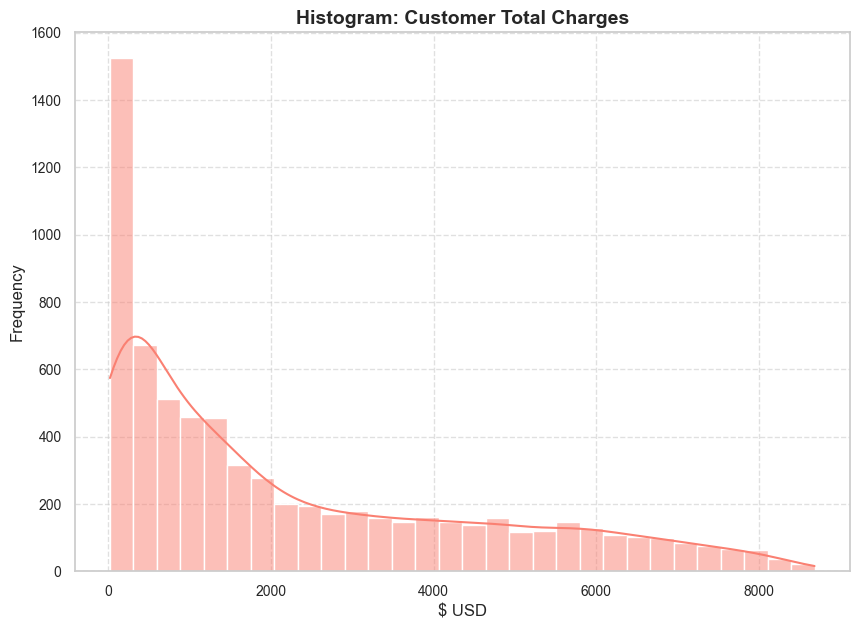

In [11]:
# Histogram: TotalCharges
histogram_graph('TotalCharges', 'Customer Total Charges', '$ USD', 'salmon')


The histograms for the numerical varibales suggest:
- Tenure: there exists a primarily uniform distribution to tenure across customers. The two main exceptions can be found at 0 and 70+ months i.e. newest and oldest customers, where the numbers as considerably higher
- Monthly charges: most customer charged for the montly view concentrate aroun $20
- Total charges: the distribution for total charges is heavily right skewed, with fewer customer being charged $4,000+

#### Categorical variables

In [12]:
# Define column bar plotting function

def column_graph_(vars, colours, titles):

    # List of categorical variables
    cat_vars = vars

    # Figure
    plt.figure(figsize=(12, 8))


    for i, var in enumerate(cat_vars, 1):
        # Percentage calculations for each category of each variable
        counts = raw_data[var].value_counts(normalize=True) * 100 
        
        counts_df = counts.reset_index()
        counts_df.columns = [var, ' ']
        
        # Plots
        plt.subplot(1, len(cat_vars), i)
        counts_df.set_index(var).T.plot(kind='bar', stacked=True, color=colours, width=0.6, ax=plt.gca())
        plt.title(titles[i-1] + '\nBreakdown', fontsize=14, fontweight='bold')
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.legend(title = None)
        
        # Display the percentage values on top of the bars
        for p in plt.gca().patches:
            plt.gca().annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), ha='center', va='center', fontsize=10, color='black')

    plt.show()

##### Demographics

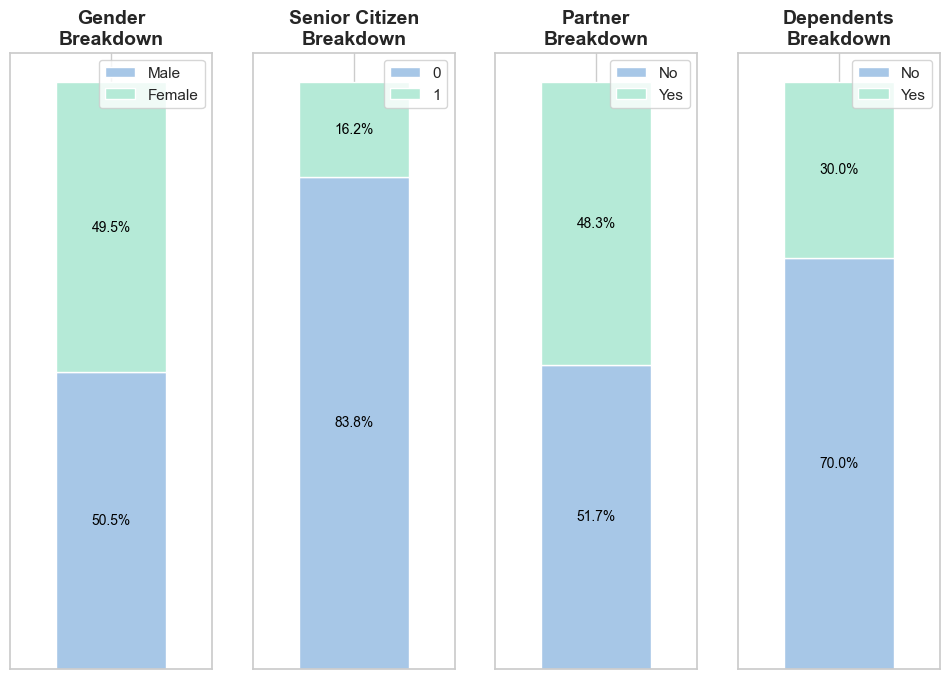

In [13]:
# Categorical variables: Demographics
column_graph_(['gender', 'SeniorCitizen', 'Partner', 'Dependents'], ['#A7C7E7', '#B5EAD7'],
              ['Gender', 'Senior Citizen', 'Partner', 'Dependents'])

##### Account Information

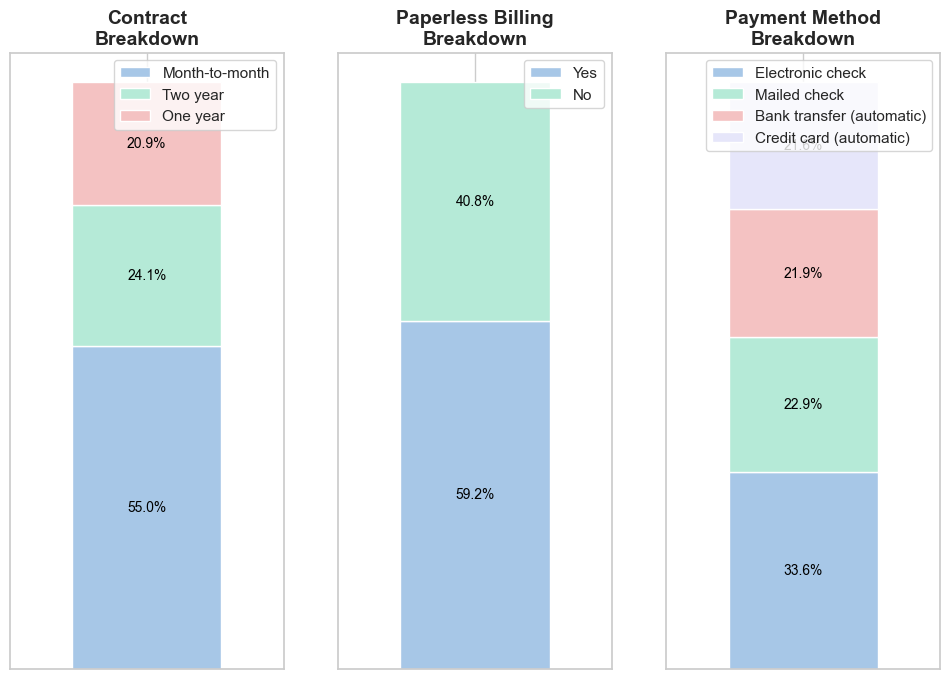

In [14]:
# Categorical variables: Account information

column_graph_(['Contract', 'PaperlessBilling', 'PaymentMethod'],
              ['#A7C7E7', '#B5EAD7', '#F4C2C2', '#E6E6FA'], ['Contract', 'Paperless Billing', 'Payment Method'])

##### Select Customer Services

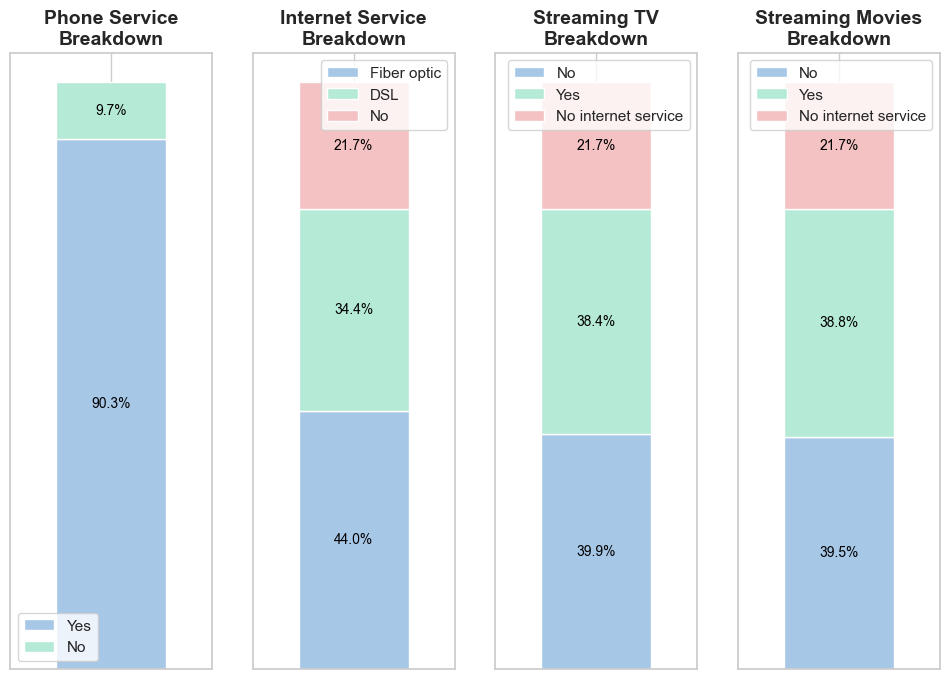

In [15]:
# Categorical variables: Select customer services
column_graph_(['PhoneService', 'InternetService', 'StreamingTV', 'StreamingMovies'], ['#A7C7E7', '#B5EAD7', '#F4C2C2', '#E6E6FA'],
              ['Phone Service', 'Internet Service', 'Streaming TV', 'Streaming Movies'])

##### Customer Churn

In [16]:
# Churn count overview
raw_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [17]:
# Plot churn across categorical variables
def churn_cat(var, title):
    #Plot calculations
    gender_churn = raw_data.groupby([var, 'Churn']).size().unstack(fill_value=0)
    gender_churn_percentage = gender_churn.div(gender_churn.sum(axis=1), axis=0) * 100

    # Plot
    ax = gender_churn_percentage.plot(kind='bar', stacked=True, color=['#A7C7E7', '#F4C2C2'], figsize=(8, 6))

    # Add data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.),
                    xytext=(0, 0),
                    textcoords='offset points',
                    ha='center', va='center', fontsize=10, color='black')

    plt.title('Churn by: ' + title, fontsize=14, fontweight='bold')
    plt.xlabel(title)
    plt.legend(labels=['Stayed', 'Churned'])
    plt.xticks(rotation=0)
    ax.grid(False)
    ax.yaxis.set_visible(False)
    plt.show()

Below a review of potentially churn-correlated categorical variables

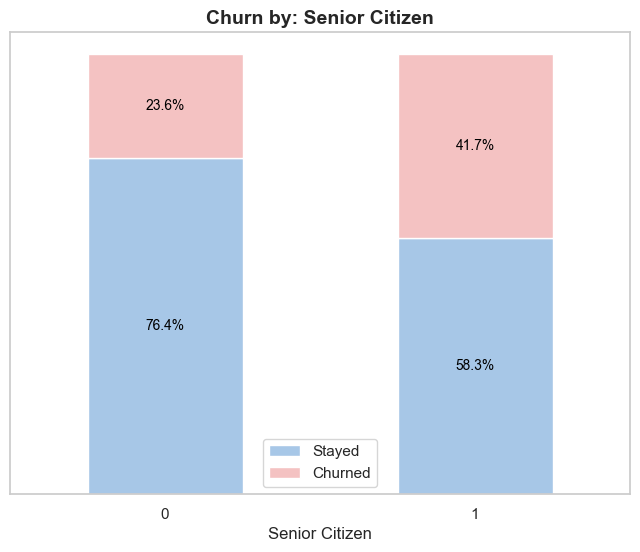

In [18]:
churn_cat('SeniorCitizen', 'Senior Citizen')

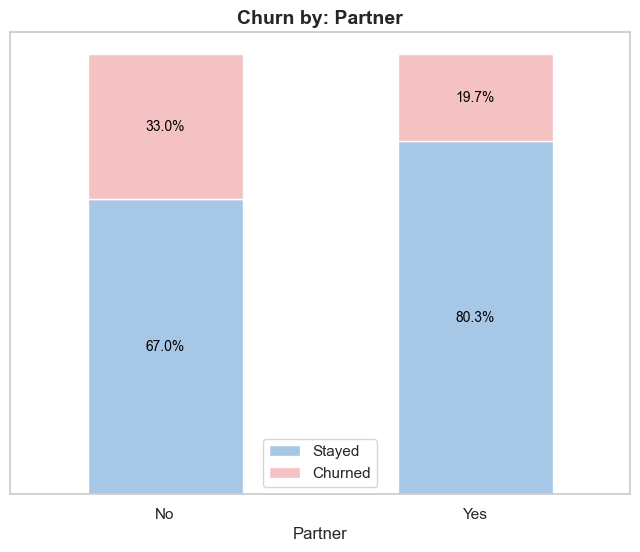

In [19]:
churn_cat('Partner', 'Partner')

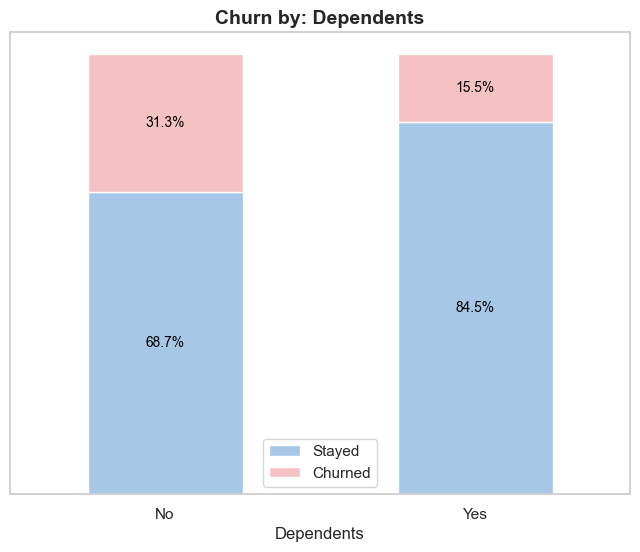

In [20]:
churn_cat('Dependents', 'Dependents')

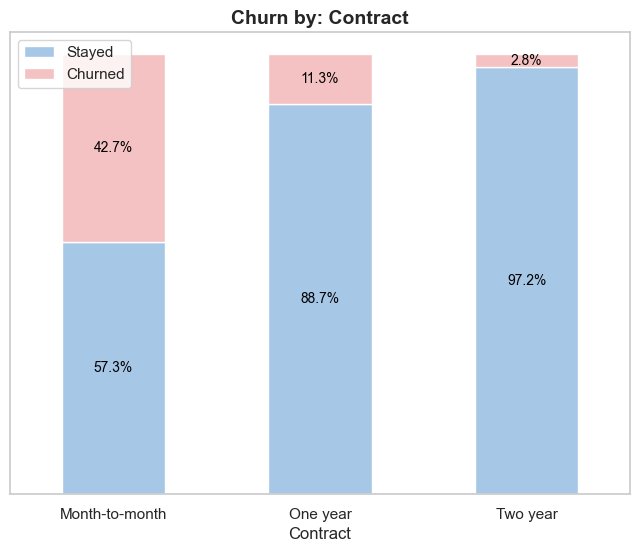

In [21]:
churn_cat('Contract', 'Contract')

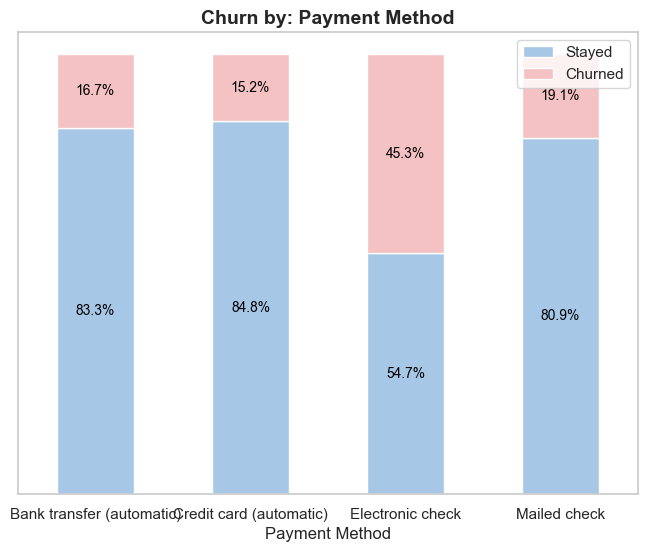

In [22]:
churn_cat('PaymentMethod', 'Payment Method')

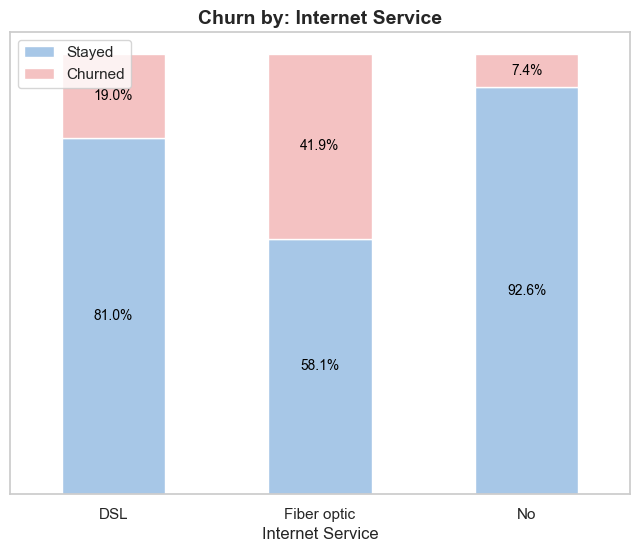

In [23]:
churn_cat('InternetService', 'Internet Service')

Below a review of potentially churn-correlated numerical variables

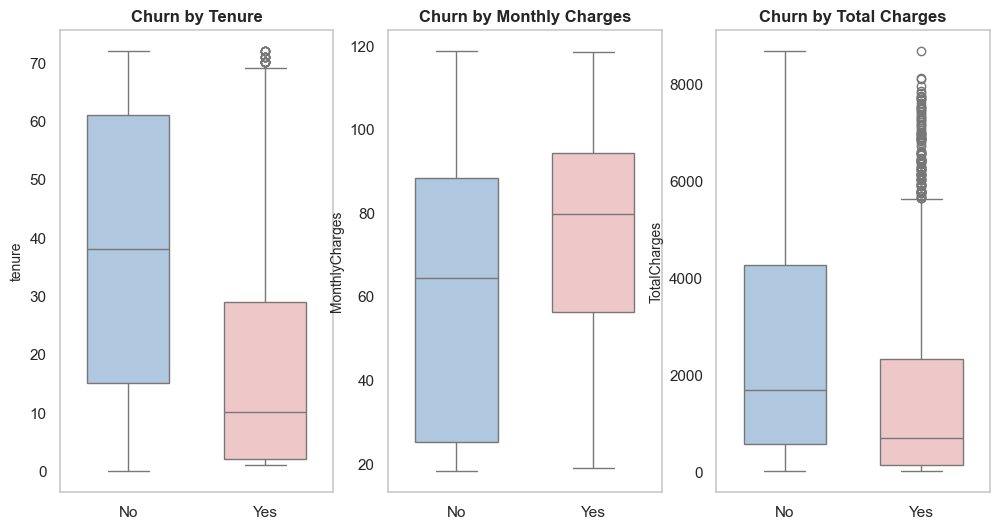

In [24]:
warnings.simplefilter(action='ignore', category=FutureWarning)

# Boxplot for churn across numerical variables
numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']
titles = ['Tenure', 'Monthly Charges', 'Total Charges']
plt.figure(figsize=(12, 6))

for i, var in enumerate(numerical_vars, 1):
    plt.subplot(1, len(numerical_vars), i)
    sns.boxplot(x=raw_data['Churn'], y=raw_data[var], palette=['#A7C7E7', '#F4C2C2'], width=0.6)  
    plt.title('Churn by ' + titles[i-1], fontsize=12, fontweight='bold')  
    plt.xlabel('')
    plt.ylabel(var, fontsize=10)
    plt.grid(False)

plt.show()


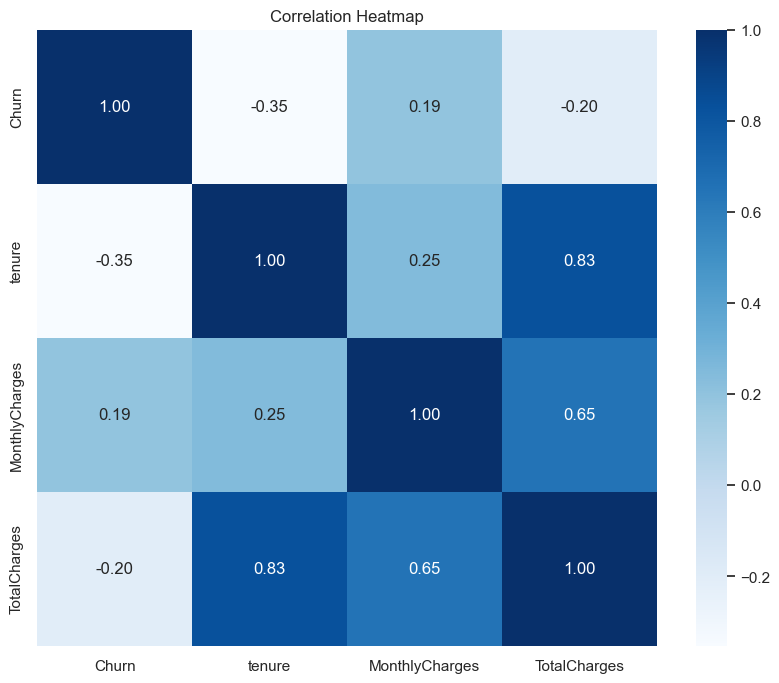

In [25]:
# Correlation matrix
raw_data['Churn'] = raw_data['Churn'].map({'Yes': 1, 'No': 0})
corr = raw_data[['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

The univariate and multivariate analysis suggests that variables as `SeniorCitizen`, type of `Contract`, `Internet Service`, `tenure` and `MonthlyCharges` may have a significantly different behaviour for churned vs not churned customers.

#### Save updated dataset for SQL Queries

In [26]:
# Update variable names for consistency
raw_data = raw_data.rename(columns={
    'customerID': 'CustomerID',
    'gender': 'Gender',
    'tenure': 'Tenure'
    })

# Separate data for SQL DB design
customers = raw_data[['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents']]
PhoneServices = raw_data[['CustomerID', 'PhoneService', 'MultipleLines']]
InternetServices = raw_data[['CustomerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]
AccountFeatures = raw_data[['CustomerID', 'Tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod']]
AccountCharges = raw_data[['CustomerID', 'MonthlyCharges', 'TotalCharges']]

# Save corresponding data files

for table, name in zip([customers, PhoneServices, InternetServices, AccountFeatures, AccountCharges], ['customers', 'PhoneServices', 'InternetServices', 'AccountFeatures', 'AccountCharges']):
    table.to_csv(f'..\Data\{name}.csv', index=False)

### Feature Engineering

#### One Hot Encoding for Categorical Variables

In [148]:
# Variables recorded as 'Yes' and 'No'
cat_vars = ['SeniorCitizen', 'Partner', 'Dependents']

for var in cat_vars:
    raw_data[var] = raw_data[var].map({'Yes': 1, 'No': 0})

In [149]:
# Remaining nominal variables
raw_data = pd.get_dummies(raw_data, columns=['Contract', 'PaymentMethod', 'InternetService'], drop_first=True)

#### Missing Values: Total Charges

In [150]:
# Median imputation for missing values (skewed distribution)
raw_data['TotalCharges'].fillna(raw_data['TotalCharges'].median(), inplace=True)

#### Feature Scaling: MinMax Scaler

In [151]:
scaler = MinMaxScaler()
raw_data[['Tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(raw_data[['Tenure', 'MonthlyCharges', 'TotalCharges']])

#### Save updated dataset for ML Model

In [152]:
raw_data.to_csv('..\Data\ml_data.csv', index=False)